#  Analizing courier events

Danilo Lessa Bernardineli (danilo.lessa@gmail.com)

## Dependencies, definitions and magic

In [4]:
# Dependences
import pickle as pkl
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
import scipy.stats as st
import pylab
import os
pylab.rcParams['figure.figsize'] = (15, 5)

In [5]:
# Definitions
data_path = os.expanduser("~/computacoes/analises/output/eventos.csv")

AttributeError: module 'os' has no attribute 'expanduser'

In [6]:
dat = pd.read_csv(data_path)
dat.time = pd.to_datetime(dat.time, unit='s')

EmptyDataError: No columns to parse from file

In [37]:
# Condições identificando que o objeto deve ser retirado
cond = (dat.tipo == "LDI") & ((dat.status == 0) |
                              (dat.status == 1) |
                              (dat.status == 3) |
                              (dat.status == 14))

In [31]:
rdat = dat[cond]
objetos = np.unique(dat.ob_numero)
obj_dict = {"ob_numero":[], "tmax": [], "tmin": [], "retirada": []}
for objeto in objetos:
    obj_dict["ob_numero"].append(objeto)
    obj_dict["tmax"].append(np.max(dat[dat.ob_numero == objeto].time))
    obj_dict["tmin"].append(np.min(dat[dat.ob_numero == objeto].time))
    ndat = rdat[rdat.ob_numero == objeto]
    retirada = False
    if len(ndat > 0):
        retirada = True
    obj_dict["retirada"].append(retirada)
ndat = pd.DataFrame(obj_dict)

In [32]:
total = len(ndat)
retirados = len(ndat[ndat.retirada == True])
f = retirados / total
sigma_n = f * (1 - f)
print("Fração de objetos a retirar: %.2f" % f)
print(total)

Fração de objetos a retirar: 0.19
810


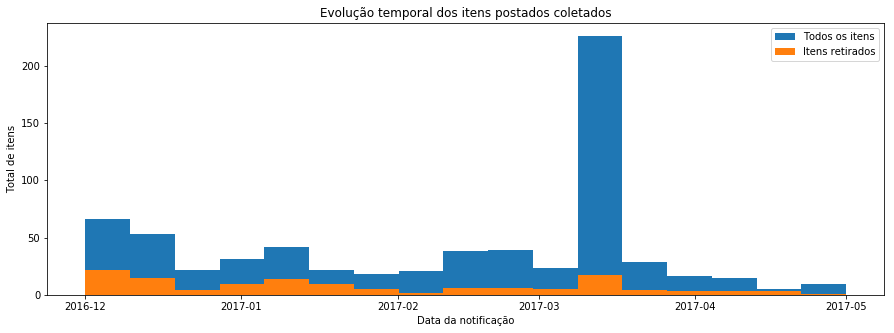

In [33]:
rang = ("2016-12-01", "2017-05-01")
bins = 4 + 12 + 1
h1 = plt.hist(ndat.tmin.values, range=rang, bins=bins, label="Todos os itens")
h2 = plt.hist(ndat[ndat.retirada == True].tmin.values, range=rang, bins=bins, label="Itens retirados")
plt.ylabel("Total de itens")
plt.xlabel("Data da notificação")
plt.title("Evolução temporal dos itens postados coletados")
plt.legend()
plt.show()

In [11]:
n = h1[0]
f = h2[0] / h1[0]
s = n * f * (1 - f)
t = pd.date_range(start="2015-12-01", end="2017-05-01", freq="M")

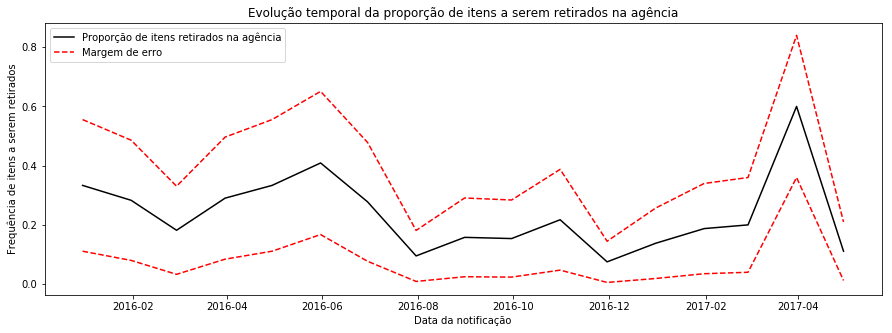

In [12]:
a = h2[0]
plt.plot(t, a/n, 'k-', label="Proporção de itens retirados na agência")
plt.plot(t, (a+s)/n, 'r--', label="Margem de erro")
plt.plot(t, (a-s)/n, 'r--')
plt.title("Evolução temporal da proporção de itens a serem retirados na agência")
plt.xlabel("Data da notificação")
plt.ylabel("Frequência de itens a serem retirados")
plt.legend()
plt.show()